<a href="https://colab.research.google.com/github/SergeevaJ/Clonned/blob/master/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22Julia_1_6_0_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Installation cell
%%capture
%%shell
if ! command -v julia 3>&1 > /dev/null
then
    wget -q 'https://julialang-s3.julialang.org/bin/linux/x64/1.6/julia-1.6.1-linux-x86_64.tar.gz' \
        -O /tmp/julia.tar.gz
    tar -x -f /tmp/julia.tar.gz -C /usr/local --strip-components 1
    rm /tmp/julia.tar.gz
fi
julia -e 'using Pkg; pkg"add IJulia; precompile;"'
echo 'Done'

After you run the first cell (the the cell directly above this text), go to Colab's menu bar and select **Edit** and select **Notebook settings** from the drop down. Select *Julia 1.6* in Runtime type. You can also select your prefered harwdware acceleration (defaults to GPU). 

<br/>You should see something like this:

> ![Colab Img](https://raw.githubusercontent.com/Dsantra92/Julia-on-Colab/master/misc/julia_menu.png)

<br/>Click on SAVE
<br/>**We are ready to get going**





In [ ]:
VERSION

v"1.6.1"

In [ ]:
using Pkg
Pkg.add("DifferentialEquations")

In [ ]:
using Pkg
Pkg.add("Plots")

In [ ]:
using Pkg
Pkg.add("Distributions")

In [ ]:
using Pkg
Pkg.add("Random")

In [ ]:
using DifferentialEquations
using Random, Distributions
using Plots

function f_motion(f) 
    fx, fy, thetta = f
    
    mu = 3 #наноНьютоны
    nu = 1 #коэффициент по времени взаимодействия клеток
    sigma_K = 0.3 #наноНьютоны
    sigma_alfa = pi/3
    K_max = mu + 3*sigma_K
    betta = 2.0
    
    K_i = abs(rand(Normal(mu, sigma_K^2)))
    alfa = rand(Normal(0, sigma_alfa^2))
    
    thetta_i = alfa * (1 - (K_i / K_max)^betta)
    mod_f_new = K_i * nu
    
    fx_new = mod_f_new * cos(thetta_i + thetta)
    fy_new = mod_f_new * sin(thetta_i + thetta)
    
    thetta_new = thetta_i + thetta
    
    f_new = [fx_new, fy_new, thetta_new]
    
end 

function f_motion_mat(matr_F) 
    
    mu = 3 #наноНьютоны
    nu = 1 #коэффициент по времени взаимодействия клеток
    sigma_K = 0.3 #наноНьютоны
    sigma_alfa = pi/3
    K_max = mu + 3*sigma_K
    betta = 2.0
    
    for i in (1:N)
        #fx, fy, thetta = f
        
        K_i = abs(rand(Normal(mu, sigma_K^2)))
        alfa = rand(Normal(0, sigma_alfa^2))
    
        thetta_i = alfa * (1 - (K_i / K_max)^betta)
        mod_f_new = K_i * nu
    
        matr_F[i] = mod_f_new * cos(thetta_i + matr_F[i+2*N])
        matr_F[i+N] = mod_f_new * sin(thetta_i + matr_F[i+2*N])
    
        matr_F[i+2*N] = thetta_i + matr_F[i+2*N]
    end
    matr_F
end 

N = 77 #количество клеток

Lx = 100.0
Ly = 100.0
L = Lx = Ly

x_max = Lx #размеры сетки
y_max = Ly

# в расчетную область помещается ≈ 4000 клеток
N_CD4TCs = 75 # треть из них - CD4+ T-клетки, остальные 2800 - CD8+ T-клетки
N_CTLs = 2     # 1% от 2800 (все 2800 CD8+ T-клетки не рассматриваем, а только ЦТЛ с частотой 1%)
N_TCells = N_CD4TCs + N_CTLs # всего в области будет 1228 Т-клеток (и одна дендритная клетка)



#задаем вектор системы, в котором каждый элемент - вектор одной клетки с параметрами [x, y, andle_speed, vx, vy]
vektor_sistem_xy = [[rand(Uniform(-x_max+5, x_max-5)), rand(Uniform(-y_max+5, y_max-5)), rand(Uniform(0, 2*pi))] for i in (1:N)]
for i in (1:N)
    push!(vektor_sistem_xy[i], rand(Normal(8, 2)) * cos(vektor_sistem_xy[i][3]))
    push!(vektor_sistem_xy[i], vektor_sistem_xy[i][4] * tan(vektor_sistem_xy[i][3]))
end
#vektor_sistem_xy

# Time settings
Δt = 0.001
t_max = 100
t = Int(div(t_max, Δt))

# Masses of bodies
m = [0.009 for i in (1:N)]
M = sum(m)
n = length(m)

# Constant
G = 9.0
mu = 1.0

# Initial values for position and velocity
Rx=[vektor_sistem_xy[i][1] for i in (1:N)]
Ry=[vektor_sistem_xy[i][2] for i in (1:N)]
R = [Rx Ry] 

Vx=[vektor_sistem_xy[i][4] for i in (1:N)]
Vy=[vektor_sistem_xy[i][5] for i in (1:N)]
V = [Vx Vy] 

f1 = [0, 0, 0]
f = [f_motion(f1) for i in (1:N)]
Fx = [f[i][1] for i in (1:N)]
Fy = [f[i][2] for i in (1:N)]
F_angle = [f[i][3] for i in (1:N)]
F = [Fx Fy F_angle]
p = [m, mu, F]

#function motion(ddu, du, u, p, t) 
 #   m, mu, F = p
  #  for i=1:size(ddu)[1]
   #ddu[i, :] .= F[i, 1:2]./m[i] .- (mu./m[i]).*du[i, :]
    #end
#end     

3-element Vector{Any}:
  [0.009, 0.009, 0.009, 0.009, 0.009, 0.009, 0.009, 0.009, 0.009, 0.009  …  0.009, 0.009, 0.009, 0.009, 0.009, 0.009, 0.009, 0.009, 0.009, 0.009]
 1.0
  [1.7676357160742813 2.382210069966242 0.9324252054499276; 2.662613733885158 1.5554038859291222 0.5286942194656649; … ; 2.585151859961726 1.3832210481744307 0.4913035682551116; 2.9095972252126163 -0.6624152060535023 -0.22385014845191156]

In [ ]:
function motion(du, u, p, t) 
    mu, F = p
    for i=1:N
        du[i, :] .= F[i, 1:2]./mu
    end
end 

motion (generic function with 1 method)

In [ ]:
p=[mu, F]
tspan=(0.0, 20.0) 
prob =ODEProblem(motion, R, tspan, p)
integrator = init(prob, Tsit5(), dt=Δt)

t: 0.0
u: 77×2 Matrix{Float64}:
 -29.3197    92.1118
 -71.2167   -66.522
 -81.7864    66.1319
  64.0315    75.7594
  66.5203   -83.393
  40.3359    57.9053
 -50.5193    41.9205
  -2.75986  -36.5643
  -5.50566   52.5663
 -73.3668    88.9634
 -39.8349   -22.6438
  -6.47189   88.5882
  43.6459    -8.05718
   ⋮        
  47.6622   -19.1385
  -0.45933  -57.3718
  85.7676   -67.0639
 -54.1457   -75.0977
  44.2089    54.4243
  42.7783   -23.198
 -87.6176   -48.311
  34.3841   -40.4382
  55.6499   -54.7279
  10.9352   -94.1859
  48.4292   -83.622
  74.0037   -57.0168

In [ ]:
#prob = SecondOrderODEProblem(motion, V, R, tspan, p)
#integrator = init(prob,SymplecticEuler(),dt=Δt)

function animate_solver(NT)
    for time = 1:NT
        step!(integrator)
        V = integrator.u[1,:]
        println(V)
        R = integrator.u[2,:]
        Rx = R[1:Int(length(R)/2)]
        Ry = R[Int(length(R)/2)+1:length(R)]
        if time%5 == 0
            integrator.p = [mu, f_motion_mat(F)]
            for i in (1:N)
                if abs(Rx[i]) >= x_max-3
                    V[i] = V[i] * (-1)
                    F[i] = F[i] * (-1)
                    integrator.p = [mu, F]
                    integrator.u[1,:] = V
                elseif abs(Ry[i]) >= y_max-3
                    V[i + N] = V[i + N] * (-1)
                    F[i + N] = F[i + N] * (-1)
                    integrator.p = [mu, F]
                    integrator.u[1,:] = V
                end
            end
        end
        
    function circleShape(x,y,r)
        phi = LinRange(0, 2*pi, 500)
        x .+ r.*sin.(phi), y .+ r.*cos.(phi)
    end
        
    Plots.plot(circleShape(0, 0, 6.5),
              seriestype=[:shape],
              lw=0.5,
      c=:green,
              linecolor=:black,
              legend=false,
          xlims=(-Lx,Lx),
          ylims=(-Ly,Ly),
              aspect_ratio=1)
    Plots.plot!(circleShape(Rx[1:N_CTLs]', Ry[1:N_CTLs]', 3.0),
              seriestype=[:shape],
              lw=0.5,
      c=:blue,
              linecolor=:black,
              legend=false,
          xlims=(-Lx,Lx),
          ylims=(-Ly,Ly),
              aspect_ratio=1)
    Plots.plot!(circleShape(Rx[N_CTLs+1:end]', Ry[N_CTLs+1:end]', 3.0),
              seriestype=[:shape],
              lw=0.5,
      c=:magenta,
              linecolor=:black,
              legend=false,
          xlims=(-Lx,Lx),
          ylims=(-Ly,Ly),
              aspect_ratio=1)
    frame(anim)
        #Plots.scatter(Rx', Ry', xlims = (-x_max, x_max), ylims = (-y_max, y_max), label=:none)
    if time%10 == 0
        frame(anim)
    end
    end
end


animate_solver (generic function with 1 method)

In [ ]:
anim = Animation()

animate_solver(200)
gif(anim, "R_AAAAAA_New.gif", fps = 25)

[-29.317972532584026, 92.1141546634227]


LoadError: ignored

Дальше уже не то 

In [ ]:
using DifferentialEquations


function f(ddu,du,u,p,t)
x,y=u
g, mu, m = p
ddu[2]= g[2] - mu/m*du[2]

end

g =[0.0, -10.0]
mu=1.0
m=2.0

u0=[4.0, 3.0]
du0=[0.0, 0.0]

p=[g, mu, m]
tspan=(0.0, 20.0)

prob = SecondOrderODEProblem(f, du0, u0, tspan, p)

sol = solve(prob, SymplecticEuler(), dt=0.01)


retcode: Success
Interpolation: 3rd order Hermite
t: 2001-element Vector{Float64}:
  0.0
  0.01
  0.02
  0.03
  0.04
  0.05
  0.060000000000000005
  0.07
  0.08
  0.09
  0.09999999999999999
  0.10999999999999999
  0.11999999999999998
  ⋮
 19.89000000000031
 19.90000000000031
 19.910000000000313
 19.920000000000314
 19.930000000000316
 19.940000000000317
 19.95000000000032
 19.96000000000032
 19.970000000000322
 19.980000000000324
 19.990000000000325
 20.0
u: 2001-element Vector{ArrayPartition{Float64, Tuple{Vector{Float64}, Vector{Float64}}}}:
 ([0.0, 0.0], [4.0, 3.0])
 ([0.0, -0.1], [4.0, 3.0])
 ([0.0, -0.1995], [4.0, 2.999])
 ([0.0, -0.2985025], [4.0, 2.997005])
 ([0.0, -0.3970099875], [4.0, 2.994019975])
 ([0.0, -0.4950249375625], [4.0, 2.990049875125])
 ([0.0, -0.5925498128746874], [4.0, 2.985099625749375])
 ([0.0, -0.689587063810314], [4.0, 2.9791741276206283])
 ([0.0, -0.7861391284912624], [4.0, 2.9722782569825252])
 ([0.0, -0.8822084328488061], [4.0, 2.9644168656976126])
 ([0.0,

In [ ]:
using DifferentialEquations, DiffEqProblemLibrary, Plots

using Plots
integrator = init(prob,Tsit5();dt=1//2^(4),tstops=[0.5])
pyplot(show=true)
plot(integrator)
for i in integrator
   
  display(plot!(integrator,vars=(0,1),legend=false))
end
step!(integrator); plot!(integrator,vars=(0,1),legend=false)
savefig("iteratorplot.png")

In [ ]:
using Pkg
Pkg.add("PyPlot")

In [ ]:
using DifferentialEquations, PyPlot

function virus_infection(du, u, p, t)
    T, I, V = u
    lambda, d, beta, gamma, k, delta = p

    du[1]=lambda - d*T -beta*T*V
    du[2] = beta*T*V - gamma*I
    du[3] = k*I -delta*V
end

lambda = 1e5
d= 0.1
beta =  2e-7
gamma= 0.5
k=100.0
delta=5.0

T0=1e6
I0=0.0
V0=10.0

u0=[T0,I0,V0]
p=[lambda, d, beta, gamma, k, delta]


6-element Vector{Float64}:
 100000.0
      0.1
      2.0e-7
      0.5
    100.0
      5.0

In [ ]:
tspan = (0.0, 20.0)
prob_ODE=ODEProblem(virus_infection, u0, tspan, p)

ODEProblem with uType Vector{Float64} and tType Float64. In-place: true
timespan: (0.0, 20.0)
u0: 3-element Vector{Float64}:
  1.0e6
  0.0
 10.0

In [ ]:
sol_ODE = solve(prob_ODE,Tsit5(),reltol=1e-14,abstol=1e-14)

retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 4851-element Vector{Float64}:
  0.0
  0.0003329020557577007
  0.0006764452378312777
  0.0011167154495234383
  0.001596572193620821
  0.0021403702163773084
  0.002724977951052172
  0.003353163699661752
  0.004014001182405614
  0.004704598095427384
  0.0054188479918159975
  0.006153308305665201
  0.006904092476884138
  ⋮
 19.761657370548182
 19.784599661979303
 19.80749167026439
 19.830320536327264
 19.853120636156625
 19.875846936851925
 19.89854066779669
 19.921195129293242
 19.943804375873505
 19.966370411382787
 19.98891113982265
 20.0
u: 4851-element Vector{Vector{Float64}}:
 [1.0e6, 0.0, 10.0]
 [999999.9993347605, 0.0006651951673649845, 9.983379811976928]
 [999999.9986494384, 0.0013503787152479077, 9.96628052060457]
 [999999.9977729078, 0.002226594222076653, 9.944444038701779]
 [999999.9968197941, 0.0031791892296676298, 9.920742659778218]
 [999999.9957424754, 0.004255699352273484, 9.894006803953255]
 [999

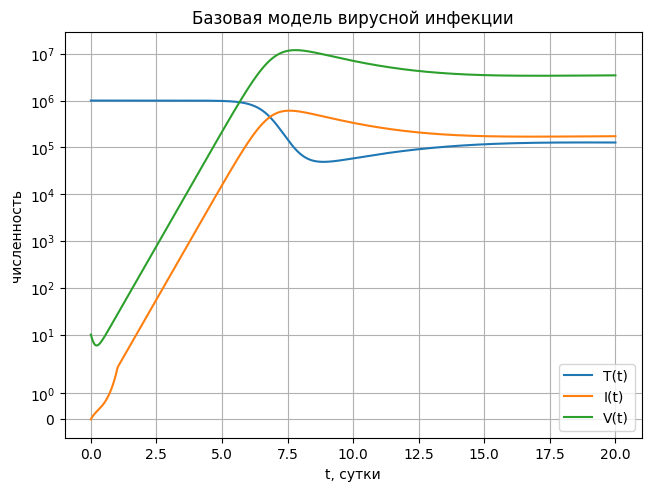

In [ ]:
tt = 0:0.01:20
yt_ODE = Array(sol_ODE(tt)')
fig = PyPlot.figure(constrained_layout=true)
ax = PyPlot.gca()
ax.plot(tt, yt_ODE)
ax.set_yscale("symlog", linthresh=1.0)
ax.set_title("Базовая модель вирусной инфекции")
ax.set_xlabel("t, сутки")
ax.set_ylabel("численность")
ax.grid("on")
ax.legend(labels=["T(t)","I(t)","V(t)"])
PyPlot.show()


In [ ]:
using DifferentialEquations
function virus_infection_DDE(du,u,h,p,t)
T,I,V = u
lambda,d,beta,gamma,k,delta,tau = p
Iprev = h(p, t-tau)[2]
du[1] = lambda - d*T - beta*T*V
du[2] = beta*T*V - gamma*I
du[3] = k*Iprev - delta*V
end

lambda = 1e5
d= 0.1
beta =  2e-7
gamma= 0.5
k=100.0
delta=5.0
tau=1.0

T0=1e6
I0=0.0
V0=10.0
u0=[T0,I0,V0]
p=[lambda, d, beta, gamma, k, delta, tau]

tspan=(0.0,20.0)
lags = [1.0]
h(p, t) = [0,0,0]
prob_DDE = DDEProblem(virus_infection_DDE,u0,h,tspan,p,
constant_lags = lags)
sol_DDE = solve(prob_DDE, MethodOfSteps(Tsit5()),
reltol=1e-14,abstol=1e-14)


retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 7957-element Vector{Float64}:
  0.0
  0.0003692003721735389
  0.0008264438459260643
  0.0013827148453479546
  0.002026051432149242
  0.002753063637614012
  0.0035523152818490228
  0.004415845918390839
  0.0053339698106458795
  0.006298614208107072
  0.007301992179339235
  0.00833770731619599
  0.009400049177480756
  ⋮
 19.966714043242465
 19.969923393675717
 19.97313384832973
 19.97634550120435
 19.979558160547352
 19.98277281270079
 19.985987823712573
 19.989204629676973
 19.99242227319432
 19.9956410898924
 19.998861136305536
 20.0
u: 7957-element Vector{Vector{Float64}}:
 [1.0e6, 0.0, 10.0]
 [999999.999262294, 0.0007376515103376082, 9.981557009526073]
 [999999.9983505909, 0.0016491363545677574, 9.958763066406194]
 [999999.9972442987, 0.0027549386461853463, 9.931102695473442]
 [999999.9959687616, 0.00402960272687229, 9.89920881067514]
 [999999.9945323508, 0.005464633135368306, 9.863289905783471]
 [999999.99

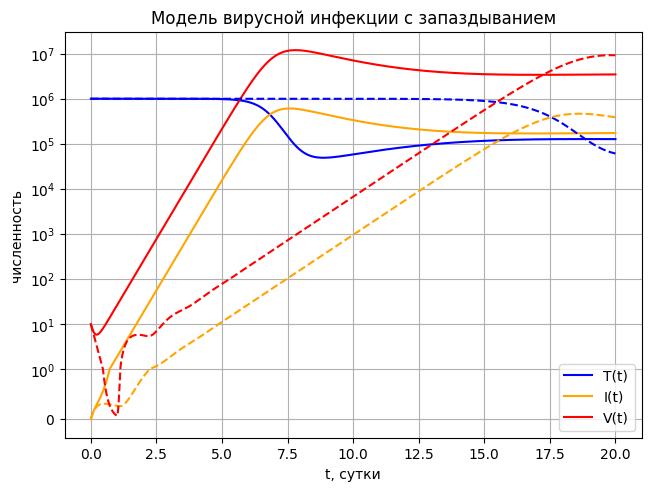

In [ ]:
tt = 0:0.01:20
yt_DDE = Array(sol_DDE(tt)')
using PyPlot
fig = PyPlot.figure(constrained_layout=true)
ax = PyPlot.gca()
cs = ["blue","orange","red"]
for i in 1:3
    ax.plot(tt, yt_ODE[:,i], color=cs[i])
end
for i in 1:3
    ax.plot(tt, yt_DDE[:,i], "--", color=cs[i])
end
ax.set_yscale("symlog", linthreshy=1.0)
ax.set_title("Модель вирусной инфекции с запаздыванием")
ax.set_xlabel("t, сутки")
ax.set_ylabel("численность")
ax.grid("on")
ax.legend(labels=["T(t)","I(t)","V(t)"])

PyPlot.show()

In [ ]:
using DifferentialEquations

lambda = 1e5
d= 0.1
beta =  2e-7
gamma= 0.5
k=100.0
delta=5.0
p=[lambda, d, beta, gamma, k, delta]

tspan=(0.0, 20.0)

rate1(u,p,t) = lambda
function affect1!(integrator)
integrator.u[1] += 1
end
jump1 = ConstantRateJump(rate1,affect1!)
rate2(u,p,t) = d*u[1] 
function affect2!(integrator)
integrator.u[1] -= 1 
end
jump2 = ConstantRateJump(rate2,affect2!)
rate3(u,p,t) = beta*u[1]*u[3] 
function affect3!(integrator)
integrator.u[1] -= 1
integrator.u[2] += 1 
end
jump3 = ConstantRateJump(rate3,affect3!)

rate4(u,p,t) = gamma*u[2]
function affect4!(integrator)
integrator.u[2] -= 1
end
jump4 = ConstantRateJump(rate4,affect4!)

rate5(u,p,t) = k*u[2]
function affect5!(integrator)
integrator.u[3] += 1
end
jump5 = ConstantRateJump(rate5,affect5!)

rate6(u,p,t) = delta*u[3]
function affect6!(integrator)
integrator.u[3] -= 1
end
jump6 = ConstantRateJump(rate6,affect6!)


ConstantRateJump{typeof(rate6), typeof(affect6!)}(rate6, affect6!)

In [ ]:
using DifferentialEquations
u0 = Int64.([1e6,0,10])
prob = DiscreteProblem(u0,tspan,p)
jumps = [jump1, jump2, jump3, jump4, jump5, jump6]
jump_prob = JumpProblem(prob,Direct(),jumps..., save_positions=(false,false))
sol_J = solve(jump_prob,SSAStepper(),saveat=0.1)


retcode: Default
Interpolation: Piecewise constant interpolation
t: 201-element Vector{Float64}:
  0.0
  0.1
  0.2
  0.3
  0.4
  0.5
  0.6
  0.7
  0.8
  0.9
  1.0
  1.1
  1.2
  ⋮
 18.9
 19.0
 19.1
 19.2
 19.3
 19.4
 19.5
 19.6
 19.7
 19.8
 19.9
 20.0
u: 201-element Vector{Vector{Int64}}:
 [1000000, 0, 10]
 [1000058, 0, 9]
 [1000089, 1, 17]
 [1000247, 1, 22]
 [1000053, 1, 25]
 [1000337, 2, 23]
 [1000339, 3, 37]
 [1000203, 4, 59]
 [1000302, 4, 66]
 [1000555, 5, 75]
 [1000658, 6, 98]
 [1000643, 7, 116]
 [1000723, 9, 125]
 ⋮
 [126608, 171972, 3436088]
 [126682, 171971, 3439646]
 [126820, 172120, 3443186]
 [126545, 172561, 3445373]
 [126497, 172672, 3449004]
 [126608, 172588, 3448816]
 [126582, 172767, 3450079]
 [126660, 172880, 3452715]
 [126743, 173005, 3454701]
 [126593, 173185, 3457263]
 [126616, 173374, 3458748]
 [126779, 173200, 3460914]

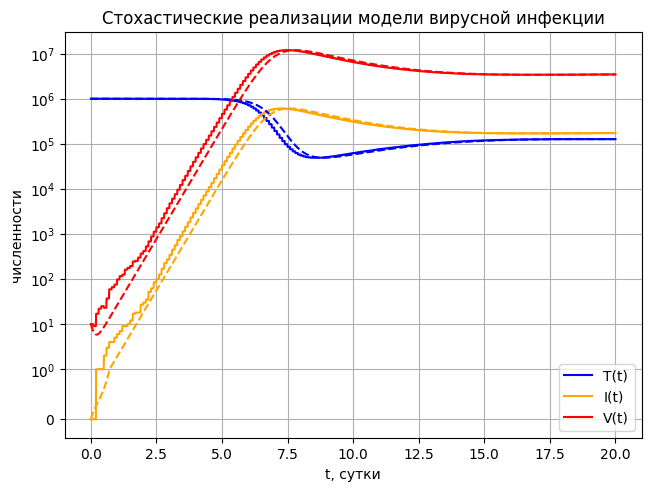

In [ ]:
tt = 0:0.01:20
yt_J = Array(sol_J(tt)')
using PyPlot
fig = PyPlot.figure(constrained_layout=true)
ax = PyPlot.gca()
cs = ["blue","orange","red"]
for i in 1:3
    ax.plot(tt, yt_J[:,i], color=cs[i])
end
for i in 1:3
    ax.plot(tt, yt_ODE[:,i], "--", color=cs[i])
end
ax.set_yscale("symlog", linthreshy=1.0)
ax.set_title("Стохастические реализации модели вирусной инфекции")
ax.set_xlabel("t, сутки")
ax.set_ylabel("численности")
ax.grid("on")
ax.legend(labels=["T(t)","I(t)","V(t)"])

PyPlot.show()

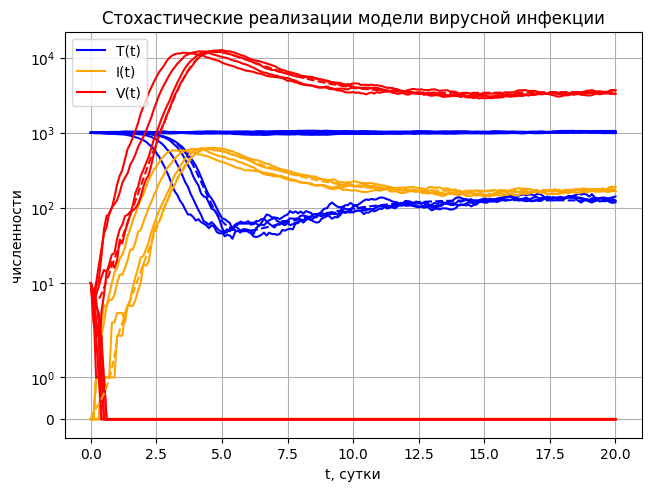

In [ ]:
using DifferentialEquations
using PyPlot

k = 100 
l = 2*10^(-7)
m = 5
n = 0.1
o = 0.5
r = 10^5 
tau = 1.0                        

T0 = 10^6                           
I0 = 0.0                           
V0 = 10

# scaling the problem to accelerate the computation
s = 1000.0
r = r/s
l = l*s
T0 = r/n

u0 = [T0,I0,V0] 
p = [k,l,m,n,o,r,tau]                      
tspan = (0.0,20.0)

function virusZ(du,u,p,t)
    T,I,V = u
    k,l,m,n,o,r,tau = p

    du[1] = dT = r - n*T - l*T*V                   
    du[2] = dI = l*T*V - o*I
    du[3] = dV = k*I - m*V
end
prob_ODE = ODEProblem(virusZ,u0,tspan,p)
sol_ODE = solve(prob_ODE,TRBDF2(),reltol=1e-14,abstol=1e-14)
tt = 0:0.1:20
yt_ODE = Array(sol_ODE(tt)')


rate1(u,p,t) = r
function affect1!(integrator)
  integrator.u[1] += 1
end
jump1 = ConstantRateJump(rate1,affect1!)

rate2(u,p,t) = n*u[1]
function affect2!(integrator)
  integrator.u[1] -= 1
end
jump2 = ConstantRateJump(rate2,affect2!)

rate3(u,p,t) = l*u[1]*u[3]
function affect3!(integrator)
  integrator.u[1] -= 1
  integrator.u[2] += 1
end
jump3 = ConstantRateJump(rate3,affect3!)

rate4(u,p,t) = o*u[2]
function affect4!(integrator)
  integrator.u[2] -= 1
end
jump4 = ConstantRateJump(rate4,affect4!)

rate5(u,p,t) = k*u[2]
function affect5!(integrator)
  integrator.u[3] += 1
end
jump5 = ConstantRateJump(rate5,affect5!)

rate6(u,p,t) = m*u[3]
function affect6!(integrator)
  integrator.u[3] -= 1
end
jump6 = ConstantRateJump(rate6,affect6!)

prob = DiscreteProblem(Int64.(u0),tspan,p)
jump_prob = JumpProblem(prob,Direct(),jump1,jump2,jump3,jump4,jump5,jump6,
			 save_positions=(false,false))
sol = solve(jump_prob,SSAStepper(),saveat=0.1)
yt = Array(sol(tt)')
GC.gc()
sol = solve(jump_prob,SSAStepper(),saveat=0.1)
yt2 = Array(sol(tt)')
GC.gc()
sol = solve(jump_prob,SSAStepper(),saveat=0.1)
yt3 = Array(sol(tt)')
GC.gc()
sol = solve(jump_prob,SSAStepper(),saveat=0.1)
yt4 = Array(sol(tt)')
GC.gc()
sol = solve(jump_prob,SSAStepper(),saveat=0.1)
yt5 = Array(sol(tt)')
GC.gc()
sol = solve(jump_prob,SSAStepper(),saveat=0.1)
yt6 = Array(sol(tt)')
GC.gc()
sol = solve(jump_prob,SSAStepper(),saveat=0.1)
yt7 = Array(sol(tt)')
GC.gc()
sol = solve(jump_prob,SSAStepper(),saveat=0.1)
yt8 = Array(sol(tt)')
GC.gc()
sol = solve(jump_prob,SSAStepper(),saveat=0.1)
yt9 = Array(sol(tt)')
GC.gc()
sol = solve(jump_prob,SSAStepper(),saveat=0.1)
yt10 = Array(sol(tt)')
GC.gc()

fig = PyPlot.figure(constrained_layout=true)
ax = PyPlot.gca()
cs = ["blue","orange","red"]
for i in 1:3
    ax.plot(tt, yt[:,i], color=cs[i])
end
for i in 1:3
    ax.plot(tt, yt2[:,i], color=cs[i])
    ax.plot(tt, yt3[:,i], color=cs[i])
    ax.plot(tt, yt4[:,i], color=cs[i])
    ax.plot(tt, yt5[:,i], color=cs[i])
    ax.plot(tt, yt6[:,i], color=cs[i])
    ax.plot(tt, yt7[:,i], color=cs[i])
    ax.plot(tt, yt8[:,i], color=cs[i])
    ax.plot(tt, yt9[:,i], color=cs[i])
    ax.plot(tt, yt10[:,i], color=cs[i])
end
for i in 1:3
    ax.plot(tt, yt_ODE[:,i], "--", color=cs[i])
end
ax.set_yscale("symlog", linthresh=1.0)
ax.set_title("Стохастические реализации модели вирусной инфекции")
ax.set_xlabel("t, сутки")
ax.set_ylabel("численности")
ax.grid("on")
ax.legend(labels=["T(t)","I(t)","V(t)"])

PyPlot.show()



In [ ]:
using DifferentialEquations
using PyPlot

k = 100 
l = 2*10^(-7)
m = 5
n = 0.1
o = 0.5
r = 10^5 
tau = 1.0                        

T0 = 10^6                           
I0 = 0.0                           
V0 = 10

# scaling the problem to accelerate the computation
s = 1000.0
r = r/s
l = l*s
T0 = r/n

u0 = [T0,I0,V0] 
p = [k,l,m,n,o,r,tau]                      
tspan = (0.0,20.0)

function virusZ(du,u,p,t)
    T,I,V = u
    k,l,m,n,o,r,tau = p

    du[1] = dT = r - n*T - l*T*V                   
    du[2] = dI = l*T*V - o*I
    du[3] = dV = k*I - m*V
end
prob_ODE = ODEProblem(virusZ,u0,tspan,p)
sol_ODE = solve(prob_ODE,TRBDF2(),reltol=1e-14,abstol=1e-14)
tt = 0:0.1:20
yt_ODE = Array(sol_ODE(tt)')


rate1(u,p,t) = r
function affect1!(integrator)
  integrator.u[1] += 1
end
jump1 = ConstantRateJump(rate1,affect1!)

rate2(u,p,t) = n*u[1]
function affect2!(integrator)
  integrator.u[1] -= 1
end
jump2 = ConstantRateJump(rate2,affect2!)

rate3(u,p,t) = l*u[1]*u[3]
function affect3!(integrator)
  integrator.u[1] -= 1
  integrator.u[2] += 1
end
jump3 = ConstantRateJump(rate3,affect3!)

rate4(u,p,t) = o*u[2]
function affect4!(integrator)
  integrator.u[2] -= 1
end
jump4 = ConstantRateJump(rate4,affect4!)

rate5(u,p,t) = k*u[2]
function affect5!(integrator)
  integrator.u[3] += 1
end
jump5 = ConstantRateJump(rate5,affect5!)

rate6(u,p,t) = m*u[3]
function affect6!(integrator)
  integrator.u[3] -= 1
end
jump6 = ConstantRateJump(rate6,affect6!)

prob = DiscreteProblem(Int64.(u0),tspan,p)
jump_prob = JumpProblem(prob,Direct(),jump1,jump2,jump3,jump4,jump5,jump6,
			 save_positions=(false,false))
sol = solve(jump_prob,SSAStepper(),saveat=0.1)
yt = Array(sol(tt)')
GC.gc()



#попытка сделать ансамбль



In [ ]:
# 2D Linear Diffusion Equation
# Used Central difference scheme

using PyPlot
using DifferentialEquations

# PHYSICAL PARAMTERS
Lx = 10.0
Ly = 10.0
# Variable declarations
NX = 101;
NY = 101;


Rc = 1.0; #radius^2 of cell
xc = 5.0; #location of cell
yc = 5.0; #location of cell
ucell = 5.0; # concentration

gcVal = 0.1;
gc = ones(99,99)*gcVal; # production
del = 0.01; # destruction
nu = 0.2; # diffusion coefficient
dx = 10/(NX-1)
dy = 10/(NY-1);
sigma = 0.25;
dt = sigma*dx*dy/nu;

x = range(0, length = NX, stop = Lx)
y = range(0, length = NY, stop = Ly)

u  = zeros(NY,NX); #create a 1xn vector of 1's
un = zeros(NY,NX);

function source_term(gc::Array{Float64,2},dx::Float64,dy::Float64,NX::Integer,NY::Integer,Thot::Float64,xc::Float64,yc::Float64,Rc::Float64)
  for i = 1:NX
      for j = 1:NY
        if (((i*dx-xc).^2+(j*dy-yc).^2 <= Rc))
            gc[i,j] = Thot
        end
      end
      end
end



function f(ddu,du,u,p,t) 
    g, mu, m = p 
     
    ddu .= g .- mu/m.*du
end 
 
g = [0.0, -9.8]
mu = 1.0 
m = 2.0 
 
u0 = [5.0, 8.0] 
du0 = [0.0, 0.0] 
 
p = [g, mu, m] 
tspan=(0.0, 20.0) 
 
prob = SecondOrderODEProblem(f, du0, u0, tspan, p)

integrator = init(prob,SymplecticEuler(),dt=dt)


function diffusion_2D(NT)
    for n in 1:NT

	# движение клетки
	step!(integrator)
	cell_x = integrator.u[3]
	cell_y = integrator.u[4]

  #integrator.p=[g, mu, m]

	# диффузия
	gc = zeros(99,99)
	source_term(gc,dx,dy,NX-2,NY-2,gcVal,cell_x,cell_y,Rc)

        un = copy(u)
        u[2:end-1,2:end-1] = (1-del*dt)*un[2:end-1,2:end-1] +
		             nu*dt/dx^2*(un[2:end-1,3:end]-
			     		 2*un[2:end-1,2:end-1] + un[2:end-1,1:end-2]) +
                             nu*dt/dy^2*(un[3:end,2:end-1]-2*un[2:end-1,2:end-1]
					  + un[1:end-2,2:end-1]) + gc*dt
        u[1,:]  .= 0.0
        u[end,:].= 0.0
        u[:,1]  .= 0.0
        u[:,end].= 0.0
    end

    figure()
    contourf(x,y,u, cmap=ColorMap("coolwarm"))
    colorbar()
    xlim(0,10)
    ylim(0,10)
    zlim(0,10)
    #p=countour(x,y,u,fill=True)
    #frame(anim)
end

#anim=Animation()
#p=countour(x,y,u,fill=True)

#gif(anim,"diff_cell.gif", fps=5 )

for i = 1:5
    diffusion_2D(10)
end



LoadError: ignored

In [ ]:
using Pkg
Pkg.add("Random")


In [ ]:
using Pkg
Pkg.add("Distributions")

In [ ]:
using Random, Distributions
etta=1.0
K_max=3.9 #mu+3sigma_K
beta=2
sigma_alfa=pi/3
sigma_k=0.3 #в наноньютонах
mu=3.0 #в наноньютонах

function update_F(f)
fx, fy, theta = f
K=abs(rand(Normal(mu,(sigma_k)^2)))
alfa=rand(Normal(0,(sigma_alfa)^2))*(1-(K/K_max)^beta)
theta=theta+alfa
f=[etta*K*sin(theta),etta*K*cos(theta), theta]

end

q=[0.324, 0.543, atan(0.543/0.324)]
update_F(q)

3-element Vector{Float64}:
 2.9969581228458493
 0.22273656874598552
 1.4966118332664573

In [ ]:
N=20
vektor_sistem_xy = [[rand(Uniform(-x_max, x_max)), rand(Uniform(-y_max, y_max)), rand(Uniform(0, 2*pi))] for i in (1:N)]
for i in (1:N)
    push!(vektor_sistem_xy[i], rand(Normal(8, 2)) * cos(vektor_sistem_xy[i][3]))
    push!(vektor_sistem_xy[i], vektor_sistem_xy[i][4] * tan(vektor_sistem_xy[i][3]))
end
vektor_sistem_xy

20-element Vector{Vector{Float64}}:
 [34.057328333587236, 8.21645916164853, 2.7107343884136994, -7.351098447303307, 3.3790075270415096]
 [-0.5739687056890261, 7.3055586918733795, 0.39521260980524153, 5.625696889438591, 2.3468236975761614]
 [12.190167191059338, 5.104134810197856, 0.25697146432040213, 11.434031815466637, 3.004649571964356]
 [-22.969578081094504, -2.666472450135956, 1.073348852600546, 4.567188427046976, 8.41114025081957]
 [4.147078919386132, 20.407406994061148, 4.820988799293623, 1.0971936909333573, -10.06333989798175]
 [14.64195118380271, -27.888597435307556, 4.34468707691206, -2.906290174313898, -7.544461325641816]
 [-35.86549941575926, -16.90415259663233, 3.98193475906489, -4.7146258855527865, -5.263410902872854]
 [-9.064830640140826, -13.493794644032047, 2.8216388180415843, -6.994886716949657, 2.3176729769180024]
 [-22.312283556988266, 21.170114802292247, 5.9061327612931995, 5.345806948103259, -2.1169345653474547]
 [-3.3058004344186287, 24.09497581882286, 1.9200254524

In [ ]:
q=[]
q.push()

In [ ]:
for i in 1:number_of_cells
if abs(x0[i][1])>=abs(s1)
v0[i][2]=-v0[i][2]
end

if abs(x0[i][1])>=abs(s1)
v0[i][1]=-v0[i][1]
end
end
println(x0)
println(v0)

LoadError: ignored

In [ ]:
using DifferentialEquations
using LinearAlgebra
using Plots


N=20



vektor_sistem_xy = [[rand(Uniform(-x_max, x_max)), rand(Uniform(-y_max, y_max)), rand(Uniform(0, 2*pi))] for i in (1:N)]
for i in (1:N)
    push!(vektor_sistem_xy[i], rand(Normal(8, 2)) * cos(vektor_sistem_xy[i][3]))
    push!(vektor_sistem_xy[i], vektor_sistem_xy[i][4] * tan(vektor_sistem_xy[i][3]))
end



using Random, Distributions
etta=1.0
K_max=3.9 #mu+3sigma_K
beta=2
sigma_alfa=pi/3
sigma_k=0.3 #в наноньютонах
mu=3.0 #в наноньютонах

function update_F(f)
fx, fy, theta = f
K=abs(rand(Normal(mu,(sigma_k)^2)))
alfa=rand(Normal(0,(sigma_alfa)^2))*(1-(K/K_max)^beta)
theta=theta+alfa
f=[etta*K*sin(theta),etta*K*cos(theta), theta]

end





f1 = [0, 0, 0]
f = [update_F(f1) for i in (1:N)]
println(f)
Fx = [f[i][1] for i in (1:N)]
Fy = [f[i][2] for i in (1:N)]
F_angle=[f[i][3] for i in (1:N)]
F = [Fx Fy F_angle]

function update_F_mat(F)
    
    mu = 3 #наноНьютоны
    nu = 1 #коэффициент по времени взаимодействия клеток
    sigma_K = 0.3 #наноНьютоны
    sigma_alfa = pi/3
    K_max = mu + 3*sigma_K
    betta = 2.0
    
    for i in (1:N)
        #fx, fy, thetta = f
        
        K_i = abs(rand(Normal(mu, sigma_K^2)))
        alfa = rand(Normal(0, sigma_alfa^2))
    
        thetta_i = alfa * (1 - (K_i / K_max)^betta)
        mod_f_new = K_i * nu
    
        F[i] = mod_f_new * cos(thetta_i + F[i+2*N])
        F[i+N] = mod_f_new * sin(thetta_i + F[i+2*N])
    
        F[i+2*N] = thetta_i + F[i+2*N]
    end
    F
end


Δt = 0.001
t_max = 100
t = Int(div(t_max, Δt))

# Masses of bodies
m = [0.001 for i in (1:N)]
M = sum(m)
n = length(m)

# Constant
mu = 1.0

# Initial values for position and velocity
Rx=[vektor_sistem_xy[i][1] for i in (1:N)]
Ry=[vektor_sistem_xy[i][2] for i in (1:N)]
R = [Rx Ry]

vx=[vektor_sistem_xy[i][4] for i in (1:N)]
vy=[vektor_sistem_xy[i][5] for i in (1:N)]
V = [vx, vy]


[[-1.0762305143251636, 2.930836576339748, -0.35192305531952434], [-1.5305868109954428, 2.5565621728799672, -0.5394553062087839], [0.9068263072854743, 2.8012668797777356, 0.31307380996509787], [0.11322865948560594, 3.0837534153028208, 0.036701318331552144], [1.1387595275856708, 2.665424059999629, 0.40376126182079125], [2.0310075032252257, 2.3204709993339216, 0.7189752989263911], [1.6321198162583115, 2.4752587440891314, 0.5829364206023128], [1.8202290936455576, 2.4886929063042773, 0.6314902149603294], [0.9088025690939492, 2.7999229063802145, 0.3138531372254816], [-1.4181714865763104, 2.6494547408209526, -0.4914632675551193], [-0.5464367253447037, 3.0599105018736497, -0.17671650003279252], [0.21586437069098974, 3.091082148165738, 0.06972136932334189], [-0.7966818001351945, 3.023660975216105, -0.2576272869238231], [0.5991401633104949, 2.873596155474705, 0.20555357185049491], [0.6252293382058143, 3.0177712810992916, 0.2042921552656762], [2.780387905616025, 1.0706855714538572, 1.203213492364

2-element Vector{Vector{Float64}}:
 [1.402176757838588, 5.744044759278476, 2.0380871775322618, 7.853995514247835, -1.7903626745281218, 0.755328336150187, 6.122093491268777, -2.5047298453968585, 2.214977769668696, -8.911988836160244, -5.10804671240315, -6.163841783263014, -8.602780475546579, -4.9134589763180045, 5.867427482287726, 5.460946368468643, -1.7268195341405466, -0.3446003437012566, -9.632152047729711, 0.9312686366785591]
 [-7.079264262126017, 2.7736747030102102, -8.782060197570164, 1.0372572398523783, 7.69926698885485, -5.792665539294024, -5.610352861822952, -9.468095536989381, 5.2523400614008935, -4.469506873186984, -3.658631503366485, -2.9534804674731463, -3.4755552735080255, -2.544699431572297, -4.4766374071574315, -4.142805144125915, -10.387780155409477, -6.186845691208078, 3.266208135516942, -8.676318185930766]

In [ ]:
function motion(ddu,du,u,m,t) 
    for i=1:size(ddu)[1]   
        ddu[i, :] .=f[i,1:2]./m[i] - (mu./m[i]).*du[i, :]
    end
end     
tspan=(0.0, 20.0) 

prob = SecondOrderODEProblem(motion, V, R, tspan, m)
integrator = init(prob,SymplecticEuler(),dt=Δt)

counter=0

LoadError: ignored

In [ ]:
using DifferentialEquations
using LinearAlgebra
using Plots


N=20



vektor_sistem_xy = [[rand(Uniform(-x_max, x_max)), rand(Uniform(-y_max, y_max)), rand(Uniform(0, 2*pi))] for i in (1:N)]
for i in (1:N)
    push!(vektor_sistem_xy[i], rand(Normal(8, 2)) * cos(vektor_sistem_xy[i][3]))
    push!(vektor_sistem_xy[i], vektor_sistem_xy[i][4] * tan(vektor_sistem_xy[i][3]))
end



using Random, Distributions
etta=1.0
K_max=3.9 #mu+3sigma_K
beta=2
sigma_alfa=pi/3
sigma_k=0.3 #в наноньютонах
mu=3.0 #в наноньютонах

K=abs(rand(Normal(mu,(sigma_k)^2)))
theta=rand(Normal(0,(sigma_alfa)^2))*(1-(K/K_max)^beta)
f=[etta*K*sin(theta),etta*K*cos(theta), theta]


function update_F(f)
fx, fy, theta = f
K=abs(rand(Normal(mu,(sigma_k)^2)))
alfa=rand(Normal(0,(sigma_alfa)^2))*(1-(K/K_max)^beta)
theta=theta+alfa
f=[etta*K*sin(theta),etta*K*cos(theta), theta]

end



#Initial system state

# Time settings
Δt = 0.001
t_max = 100
t = Int(div(t_max, Δt))

# Masses of bodies
m = [0.001 for i in (1:N)]
M = sum(m)
n = length(m)

# Constant
mu = 1.0

# Initial values for position and velocity
Rx=[vektor_sistem_xy[i][1] for i in (1:N)]
Ry=[vektor_sistem_xy[i][2] for i in (1:N)]
R = [Rx Ry]

vx=[vektor_sistem_xy[i][4] for i in (1:N)]
vy=[vektor_sistem_xy[i][5] for i in (1:N)]
V = [vx, vy]

function motion(ddu,du,u,m,t) 
    for i=1:size(ddu)[2]
        ddu[i, :] .=f./m - (mu./m[i]).*du[i, :]
    end
end     
tspan=(0.0, 20.0) 

prob = SecondOrderODEProblem(motion, V, R, tspan, m)
integrator = init(prob,SymplecticEuler(),dt=Δt)

counter=0

function animate_solver(NT)
    for time = 1:NT
        counter=counter+Δt
        step!(integrator)
        if counter==30.0
        counter=0
        f=update_F(f)
        end
        V = integrator.u[1,:]
        R = integrator.u[2,:]
        Rx = R[1:Int(length(R)/2)]
        Ry = R[Int(length(R)/2)+1:length(R)]
        Plots.scatter(Rx', Ry', xlims = (-40, 40), ylims = (-40, 40))
        if time%10 == 0
            frame(anim)
        end
 
  end
end

anim = Animation()

animate_solver(1000)
gif(anim, "R_AAAAAA.gif", fps = 25)




LoadError: ignored


**The next three cells are for GPU benchmarking. If you are using this notebook for the first time and have GPU enabled, you can give it a try.** 

### Optional GPU Experiments

In [ ]:
using Pkg
Pkg.add(["BenchmarkTools", "CUDA"])
using BenchmarkTools, CUDA

if has_cuda_gpu()
  print("The GPU device is:", CUDA.device())
end

In [ ]:
mcpu = rand(2^10, 2^10)
@benchmark mcpu*mcpu

In [ ]:
println("The CuArrray operation should take around 0.5 ms(excluding CUDA downloading time which is a one time process), and should be much faster. If so, the GPU is working.")
mgpu = cu(mcpu)
@benchmark CUDA.@sync mgpu*mgpu